<a id='0'></a>
# 1. Problem Definition

The goal of this case study is to build a machine learning model for Stock Clustering using K-Means Algorithm
Learn how you can use clustering to make portfolios more diverse through unsupervised stock clustering.

<a id='1'></a>
# 2. Getting Started- Loading the data and python packages

<a id='1.1'></a>
## 2.1. Loading the python packages

In [ ]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv, set_option
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import datetime

#Import Model Packages
from sklearn.cluster import KMeans, AgglomerativeClustering,AffinityPropagation
from sklearn.metrics import adjusted_mutual_info_score
from sklearn import cluster, covariance, manifold


#Other Helper Packages and functions
import matplotlib.ticker as ticker
from itertools import cycle

import pandas as pd
from sklearn.cluster import KMeans
from math import sqrt
import  pylab as pl
import numpy as np

<a id='1.2'></a>
## 2.2. Loading the Data

In [ ]:
pip install yfinance

In [ ]:
import yfinance as yf
#https://bit.ly/2IK70kN
dataset = yf.download("AAPL MSFT AMD AVGO CHRW CPB COF CAH KMX CCL CAT CNC", start="2017-01-01")
dataset=dataset['Adj Close']
dataset.index = pd.to_datetime(dataset.index)
dataset['Date'] = dataset.index


[*********************100%%**********************]  12 of 12 completed


In [ ]:
dataset.head(1)

,AAPL,AMD,AVGO,CAH,CAT,CCL,CHRW,CNC,COF,CPB,KMX,MSFT,Date
Date,,,,,,,,,,,,,
2017-01-03,27.023706,11.43,142.199203,59.417305,79.011269,46.789989,61.557461,29.155001,78.186302,48.717155,64.82,57.138721,2017-01-03


In [ ]:
import plotly.graph_objs as go
# Using Plotly we will see how is the stock looks like.
# Plot time series the close price and volume of stock price and explain your finding
fig=go.Figure(data=[go.Scatter(name = 'AAPL',x= dataset['Date'],y= dataset['AAPL'])])
fig.update_layout(title="Closing stock's price of AAPL",xaxis_title="Date", yaxis_title="Price (in $)")
fig.show()

In [ ]:
#Diable the warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
type(dataset)

pandas.core.frame.DataFrame

<a id='2'></a>
# 3. Exploratory Data Analysis

<a id='2.1'></a>
## 3.1. Descriptive Statistics

In [ ]:
# shape
dataset.shape

(1746, 13)

In [ ]:
# peek at data
set_option('display.width', 100)
dataset.head(5)

,AAPL,AMD,AVGO,CAH,CAT,CCL,CHRW,CNC,COF,CPB,KMX,MSFT,Date
Date,,,,,,,,,,,,,
2017-01-03,27.023706,11.43,142.199203,59.417305,79.011269,46.789989,61.557461,29.155001,78.186302,48.717155,64.820000,57.138721,2017-01-03
2017-01-04,26.993456,11.43,141.186523,60.334747,78.658203,47.400219,61.675774,30.125000,79.444374,49.054573,66.760002,56.883072,2017-01-04
2017-01-05,27.130730,11.24,138.961929,59.433266,78.179047,48.198891,62.309509,30.075001,77.755196,48.950123,66.379997,56.883072,2017-01-05
2017-01-06,27.433193,11.32,140.803802,60.095421,78.212654,48.145050,62.655979,30.520000,77.948761,48.765369,65.400002,57.376106,2017-01-06
2017-01-09,27.684467,11.49,141.106781,59.640675,77.649445,48.180943,61.819427,30.985001,76.928192,48.280525,65.190002,57.193504,2017-01-09


As we can see in the table above, there are 12 attributes for each of the individuals. These attributes can be categorized as demographic, financial and behavioral attributes.

In [ ]:
# describe data
#set_option('precision', 3)
#dataset.describe()

<a id='2.2'></a>
## 3.2. Data Visualization

Let us look at the correlation. We will take a detailed look into the visualization post clustering.

<Axes: title={'center': 'Correlation Matrix'}>

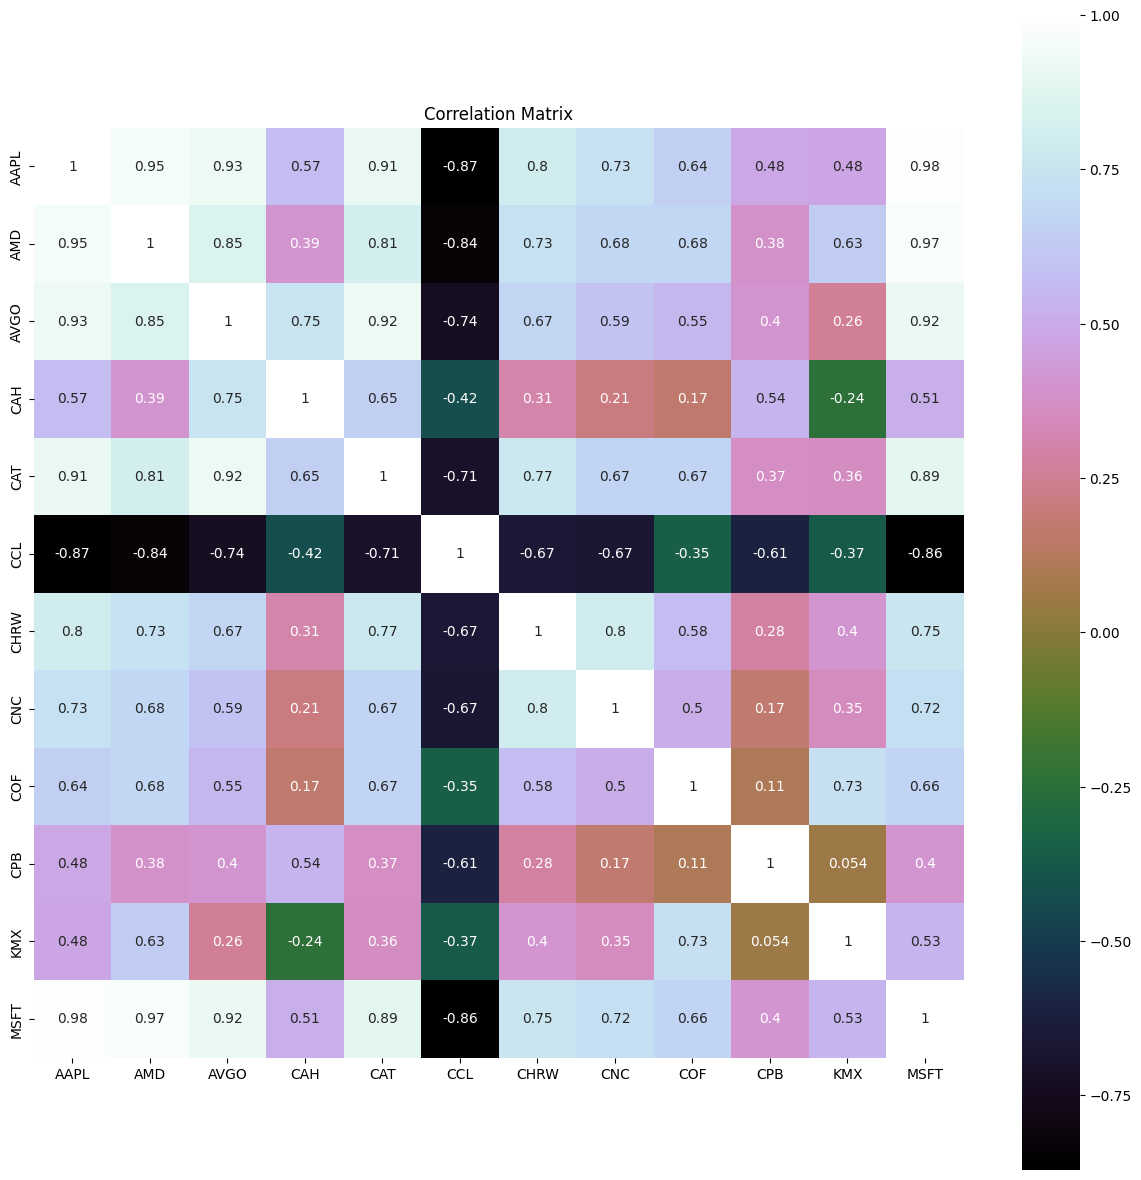

In [ ]:
# correlation
correlation = dataset.corr()
plt.figure(figsize=(15,15))
plt.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

As it can be seen by the picture above there is a significant positive correlation between the stocks.

<a id='3'></a>
## 4. Data Preparation

<a id='3.1'></a>
## 4.1. Data Cleaning
Let us check for the NAs in the rows, either drop them or fill them with the mean of the column.

In [ ]:
#Checking for any null values and removing the null values'''
print('Null Values =',dataset.isnull().values.any())

Null Values = False


Given there isn't any missing data and the data is already in the categorical format no further data cleaning was performed. The ID column which is not needed is dropeed

In [ ]:
data =dataset.copy("deep")
data =data .drop(['Date'], axis=1)
data .head()

,AAPL,AMD,AVGO,CAH,CAT,CCL,CHRW,CNC,COF,CPB,KMX,MSFT
Date,,,,,,,,,,,,
2017-01-03,27.023706,11.43,142.199203,59.417305,79.011269,46.789989,61.557461,29.155001,78.186302,48.717155,64.820000,57.138721
2017-01-04,26.993456,11.43,141.186523,60.334747,78.658203,47.400219,61.675774,30.125000,79.444374,49.054573,66.760002,56.883072
2017-01-05,27.130730,11.24,138.961929,59.433266,78.179047,48.198891,62.309509,30.075001,77.755196,48.950123,66.379997,56.883072
2017-01-06,27.433193,11.32,140.803802,60.095421,78.212654,48.145050,62.655979,30.520000,77.948761,48.765369,65.400002,57.376106
2017-01-09,27.684467,11.49,141.106781,59.640675,77.649445,48.180943,61.819427,30.985001,76.928192,48.280525,65.190002,57.193504


In [ ]:
#Calculating annual mean returns and variances
returns = data .pct_change().mean() * 252
variance = data .pct_change().std() * sqrt(252)

In [ ]:
returns.columns = ["Returns"]
variance.columns = ["Variance"]
#Concatenating the returns and variances into a single data-frame
ret_var = pd.concat([returns, variance], axis = 1).dropna()
ret_var.columns = ["Returns","Variance"]

<a id='3.2'></a>
## 4.2. Data Transformation

The data available is comprised of attributes with similar scale. Hence no data transformation is required.

<a id='4'></a>
# 5. Evaluate Algorithms and Models

In this step, we will look at the following models and perform further analysis and visualization.

1. K-means
2. Affinity Propagation

<a id='5.1'></a>
## 5.1. K-Means Clustering


In this step we look at the following metrices to get the optimum number of clusters

1. Sum of square errors (SSE) within clusters
2. Silhouette score.

<a id='5.1.1'></a>
### 5.1.1. Finding optimal number of clusters

Typically, two metrics are used to evaluate the number of clusters in K-means model.

1. Sum of square errors (SSE) within clusters
2. Silhouette score


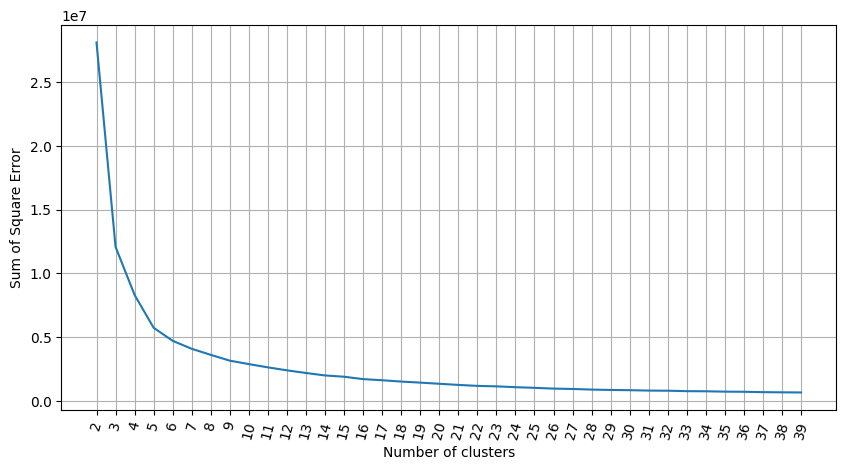

In [ ]:
distorsions = []
max_loop=40
for k in range(2, max_loop):
    k_means = KMeans(n_clusters=k)
    k_means.fit(data)
    distorsions.append(k_means.inertia_)
fig = plt.figure(figsize=(10, 5))
plt.plot(range(2, max_loop), distorsions)
plt.xticks([i for i in range(2, max_loop)], rotation=75)
plt.xlabel("Number of clusters")
plt.ylabel("Sum of Square Error")
plt.grid(True)

#### Silhouette score

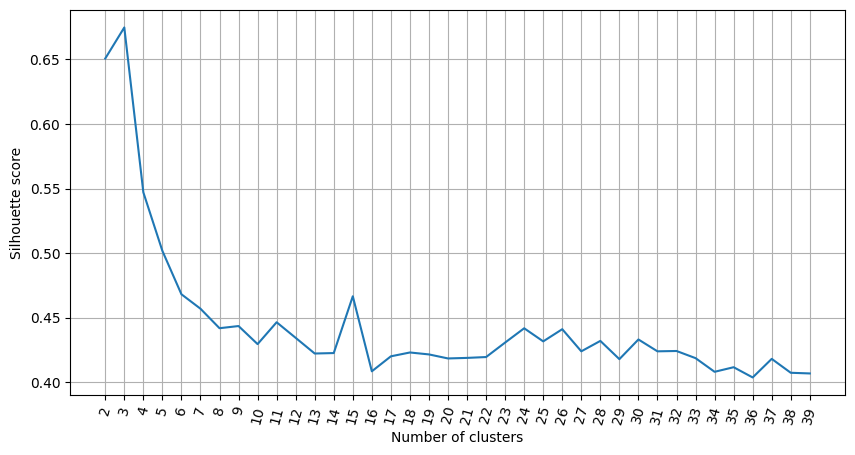

In [ ]:
from sklearn import metrics
X=data
silhouette_score = []
for k in range(2, max_loop):
        kmeans = KMeans(n_clusters=k,  random_state=10, n_init=10)
        kmeans.fit(X)
        silhouette_score.append(metrics.silhouette_score(X, kmeans.labels_, random_state=10))
fig = plt.figure(figsize=(10, 5))
plt.plot(range(2, max_loop), silhouette_score)
plt.xticks([i for i in range(2, max_loop)], rotation=75)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette score")
plt.grid(True)

Looking at both the charts above, the optimum number of clusters seem to be around 7. We can see that as the number of clusters increase pass 6, the sum of square of
errors within clusters plateaus off. From the second graph, we can see that there are
various parts of the graph where a kink can be seen. Since there is not much a difference in SSE after 7 clusters, we would use 7 clusters in the k-means model below.

<a id='5.1.2'></a>
### 5.1.2. Clustering and Visualisation

In [ ]:
nclust=7

In [ ]:
#Fit with k-means
k_means = cluster.KMeans(n_clusters=nclust)
k_means.fit(X)

KMeans(n_clusters=7)

In [ ]:
#Extracting labels
target_labels = k_means.predict(X)

<a id='5.2'></a>
## 5.2. Affinity Propagation

In [ ]:
ap = AffinityPropagation(damping = 0.5, max_iter = 250, affinity = 'euclidean')
ap.fit(X)
clust_labels2 = ap.predict(X)

In [ ]:
cluster_centers_indices = ap.cluster_centers_indices_
labels = ap.labels_
n_clusters_ = len(cluster_centers_indices)
print('Estimated number of clusters: %d' % n_clusters_)

Estimated number of clusters: 148


<a id='5.3'></a>
## 5.3. Cluster Evaluation

We evaluate the clusters using Silhouette Coefficient (sklearn.metrics.silhouette_score). Higher Silhouette Coefficient score means a model with better defined clusters.

In [ ]:
from sklearn import metrics
print("km", metrics.silhouette_score(X, k_means.labels_, metric='euclidean'))
print("ap", metrics.silhouette_score(X, ap.labels_, metric='euclidean'))

km 0.45773235238402143
ap 0.29018636480991594


k-means has much higher Silhouette Coefficient as compared to the affinity propagation.

<a id='6'></a>
# 6. Cluster Intuition
In the next step, we will check each cluster and understand the intuition behind the clusters.

In [ ]:
# cluster_output= pd.concat([pd.DataFrame(X), pd.DataFrame(k_means.labels_, columns = ['cluster'])],axis = 1)
cluster_output = pd.DataFrame(X)
cluster_output['cluster'] = k_means.labels_
output=cluster_output.groupby('cluster').mean()
output

,AAPL,AMD,AVGO,CAH,CAT,CCL,CHRW,CNC,COF,CPB,KMX,MSFT
cluster,,,,,,,,,,,,
0,60.145866,38.537715,253.821877,43.111542,117.923849,39.633916,71.647607,56.273146,80.081852,39.820503,83.850497,143.031406
1,182.462626,111.331103,869.461236,92.450715,256.335212,15.047647,88.791303,68.282280,104.821428,42.860312,75.329926,337.656145
2,161.687293,116.892486,553.563573,52.408370,199.575801,18.016243,98.510346,82.291105,132.432233,42.680900,112.682209,295.959856
3,40.383685,15.844991,197.039386,51.314203,111.926415,56.650786,72.092823,52.131075,79.942474,38.167472,66.622416,83.647928
4,151.499809,82.863359,590.128544,76.881543,229.071626,9.933906,95.543524,72.547969,97.680579,52.604855,67.178125,264.510565
5,108.927084,76.858889,322.495924,46.777512,140.917746,16.610000,85.707415,63.133259,69.823452,44.240612,96.554963,204.152027
6,137.235467,85.829967,449.185624,54.996966,196.576398,20.016080,90.384439,70.878671,125.637433,43.977105,111.450831,251.627195
